> Failed=0  
 Success=1

In [13]:
import pandas as pd
# pd.set_option('max_columns', 37)
%matplotlib inline

In [14]:
dd = pd.read_csv('0.Data/kickstarter_data_full.csv',low_memory=False)

In [15]:
def drop_columns_further(df):
    date_info=['deadline_month','deadline_day','created_at_month','created_at_day','created_at_hr',
               'launched_at_month','launched_at_day','launched_at_hr','name_len','blurb_len']
    return df.drop(date_info,axis=1)
def drop_useless_columns(df):
    look_useless=['is_starred','is_backing','permissions','pledged','currency','disable_communication','spotlight']
    redundant=['launch_to_state_change','deadline','SuccessfulBool','launch_to_state_change_days']
    state_change_date=['state_changed_at_weekday','state_changed_at_month','state_changed_at_day','state_changed_at_yr'
                      ,'state_changed_at_hr']
    too_much_info=['create_to_launch','launch_to_deadline','launch_to_state_change','location']
    too_much_info1=['state_changed_at','created_at','launched_at']
    too_much_info2=['state_changed_at','created_at','launched_at']
    for_later=['created_at_yr','launched_at_yr','deadline_yr','deadline_hr','launch_to_deadline']
    words=['name','blurb','slug','urls','profile']
    list_to_drop=['USorGB','Unnamed: 0','id','photo','currency_symbol','currency_trailing_code','static_usd_rate','creator','source_url','friends','TOPCOUNTRY']
    drop_list=look_useless+words+list_to_drop+redundant+for_later+too_much_info+too_much_info1+too_much_info2 + state_change_date
    return drop_columns_further(df.drop(drop_list,axis=1))

In [16]:
df1=drop_useless_columns(dd)

### Lets drop row that has nan values and also just keep failed and succesful state values

In [17]:
def drop_nan_and_keep_only_success_failure(data):
    mask = (data['state']=='failed') | (data['state']=='successful')
    return data[mask]

In [18]:
df=drop_nan_and_keep_only_success_failure(df1)

In [19]:
df.head()

,goal,state,country,staff_pick,backers_count,usd_pledged,category,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,create_to_launch_days,launch_to_deadline_days,LaunchedTuesday,DeadlineWeekend
0,1500.0,failed,US,False,0,0.000000,Academic,9.0,16.0,Friday,Saturday,Wednesday,17,36,0,0
1,500.0,failed,US,False,0,0.000000,Academic,4.0,15.0,Friday,Friday,Monday,10,60,0,0
2,100000.0,failed,US,False,5,120.000000,Academic,8.0,10.0,Thursday,Saturday,Sunday,1,60,0,0
3,5000.0,failed,US,False,0,0.000000,Academic,6.0,13.0,Monday,Friday,Saturday,0,30,0,0
4,3222.0,failed,DE,False,17,396.802395,Academic,7.0,18.0,Monday,Wednesday,Thursday,0,32,0,0


In [20]:
scale_mapper = {"failed":0, "successful":1}
df["state"]=df["state"].replace(scale_mapper)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
df["staff_pick"]=df["staff_pick"].astype(int)
#df["spotlight"]=df["spotlight"].astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
df=df.dropna(axis=0, how='any')

> Lets drop name_len	 and blurb_len columns

In [23]:
def divide(x,y):
    return x/y
#df['pledged_to_goal']=df[['usd_pledged','goal']].apply(divide)
#df['pledged_to_goal']=df.apply(lambda row:lst[row['J1']:row['J2']],axis=1)
df['pledged_to_goal'] = df[['usd_pledged','goal']].apply(lambda x: divide(*x), axis=1)

In [24]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X=df[['goal','usd_pledged',]]
X = sc.fit_transform(X)

In [25]:
df.head()

,goal,state,country,staff_pick,backers_count,usd_pledged,category,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,create_to_launch_days,launch_to_deadline_days,LaunchedTuesday,DeadlineWeekend,pledged_to_goal
0,1500.0,0,US,0,0,0.000000,Academic,9.0,16.0,Friday,Saturday,Wednesday,17,36,0,0,0.000000
1,500.0,0,US,0,0,0.000000,Academic,4.0,15.0,Friday,Friday,Monday,10,60,0,0,0.000000
2,100000.0,0,US,0,5,120.000000,Academic,8.0,10.0,Thursday,Saturday,Sunday,1,60,0,0,0.001200
3,5000.0,0,US,0,0,0.000000,Academic,6.0,13.0,Monday,Friday,Saturday,0,30,0,0,0.000000
4,3222.0,0,DE,0,17,396.802395,Academic,7.0,18.0,Monday,Wednesday,Thursday,0,32,0,0,0.123154


In [26]:
df[['goal','usd_pledged']]=X

In [27]:
df.head()

,goal,state,country,staff_pick,backers_count,usd_pledged,category,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,create_to_launch_days,launch_to_deadline_days,LaunchedTuesday,DeadlineWeekend,pledged_to_goal
0,-0.287671,0,US,0,0,-0.125071,Academic,9.0,16.0,Friday,Saturday,Wednesday,17,36,0,0,0.000000
1,-0.315068,0,US,0,0,-0.125071,Academic,4.0,15.0,Friday,Friday,Monday,10,60,0,0,0.000000
2,2.410959,0,US,0,5,-0.105605,Academic,8.0,10.0,Thursday,Saturday,Sunday,1,60,0,0,0.001200
3,-0.191781,0,US,0,0,-0.125071,Academic,6.0,13.0,Monday,Friday,Saturday,0,30,0,0,0.000000
4,-0.240493,0,DE,0,17,-0.060702,Academic,7.0,18.0,Monday,Wednesday,Thursday,0,32,0,0,0.123154


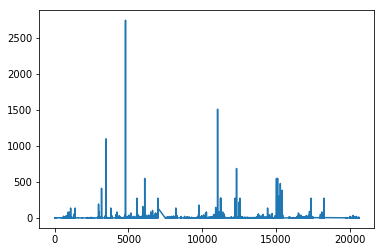

In [28]:
%matplotlib inline
df.goal.plot()

> Dummpy variable created.

In [29]:
df.dtypes

goal                       float64
state                        int64
country                     object
staff_pick                   int64
backers_count                int64
usd_pledged                float64
category                    object
name_len_clean             float64
blurb_len_clean            float64
deadline_weekday            object
created_at_weekday          object
launched_at_weekday         object
create_to_launch_days        int64
launch_to_deadline_days      int64
LaunchedTuesday              int64
DeadlineWeekend              int64
pledged_to_goal            float64
dtype: object

In [30]:
df = pd.get_dummies(df, columns=['country'])
df = pd.get_dummies(df, columns=['category'])
df = pd.get_dummies(df, columns=['deadline_weekday'])
df = pd.get_dummies(df, columns=['created_at_weekday'])
df = pd.get_dummies(df, columns=['launched_at_weekday'])
df.shape

(15787, 77)

In [31]:
df.head()

,goal,state,staff_pick,backers_count,usd_pledged,name_len_clean,blurb_len_clean,create_to_launch_days,launch_to_deadline_days,LaunchedTuesday,...,created_at_weekday_Thursday,created_at_weekday_Tuesday,created_at_weekday_Wednesday,launched_at_weekday_Friday,launched_at_weekday_Monday,launched_at_weekday_Saturday,launched_at_weekday_Sunday,launched_at_weekday_Thursday,launched_at_weekday_Tuesday,launched_at_weekday_Wednesday
0,-0.287671,0,0,0,-0.125071,9.0,16.0,17,36,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.315068,0,0,0,-0.125071,4.0,15.0,10,60,0,...,0,0,0,0,1,0,0,0,0,0
2,2.410959,0,0,5,-0.105605,8.0,10.0,1,60,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.191781,0,0,0,-0.125071,6.0,13.0,0,30,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.240493,0,0,17,-0.060702,7.0,18.0,0,32,0,...,0,0,1,0,0,0,0,1,0,0


In [32]:
from sklearn.model_selection import train_test_split
y = df.state
X=df.drop(['state','staff_pick','backers_count'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.state)

> ** Lets put them into csv files **

In [33]:
X_train.to_csv('X_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

# Logistic Regression

In [34]:
# Import Logistic regression libraries
from sklearn.linear_model import LogisticRegression
#logistic = LogisticRegression()
logistic = LogisticRegression(penalty='l2')
logistic_model=logistic.fit(X_train, y_train)

In [35]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

In [36]:
logistic_model.score(X_test, y_test)

0.9905003166561115

In [37]:
pred = logistic_model.predict(X_test)

In [38]:
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, pred) 
print(cm )

[[2095   19]
 [  11 1033]]


In [39]:
from confusion_matrix import plot_confusion_matrix, show_confusion_matrix

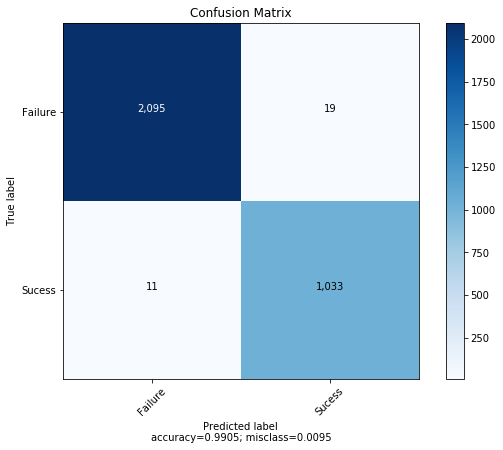

In [40]:
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")

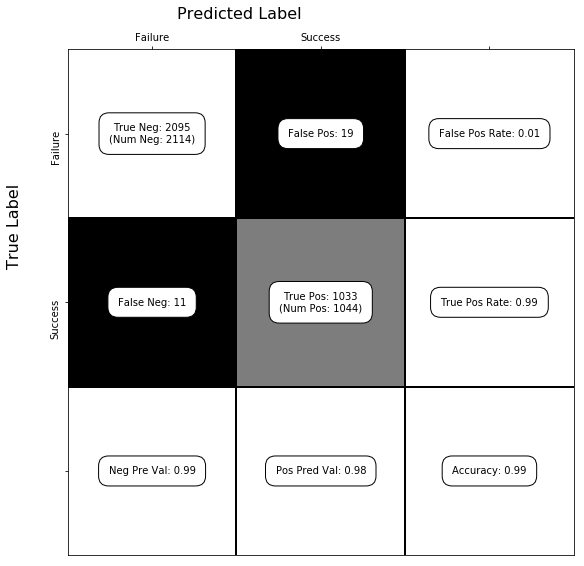

In [41]:
show_confusion_matrix(cm, ['Failure', 'Success'])

In [31]:
# Predict PROBABILITIES using regularized logistic regression
pred_prob = logistic_model.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
# Classification metrics 
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, pred)

In [32]:
from confusion_matrix import plot_roc_curve

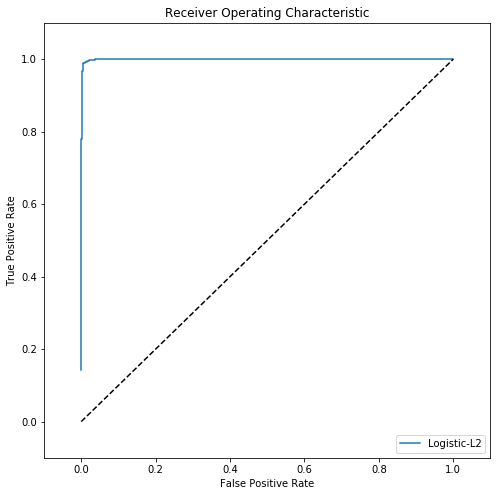

In [33]:
plot_roc_curve(fpr, tpr,'Logistic-L2')

# KNN (N=5)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train.values.ravel())
# Predicting the Test set results
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.824889170360988

In [35]:
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print( cm )

[[1991  123]
 [ 430  614]]


In [36]:
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

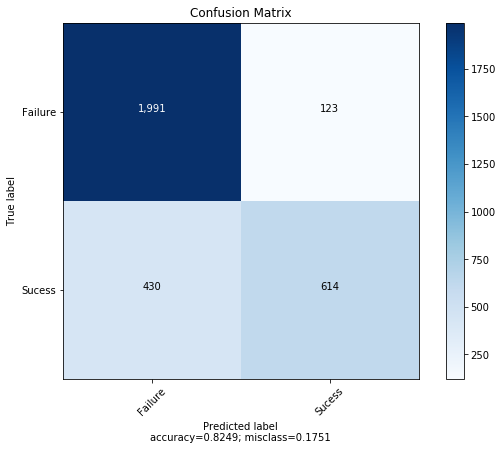

In [38]:
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")

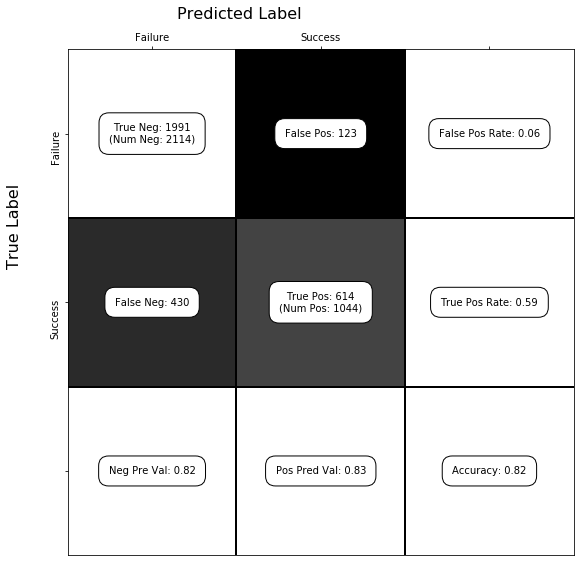

In [39]:
show_confusion_matrix(cm, ['Failure', 'Success'])

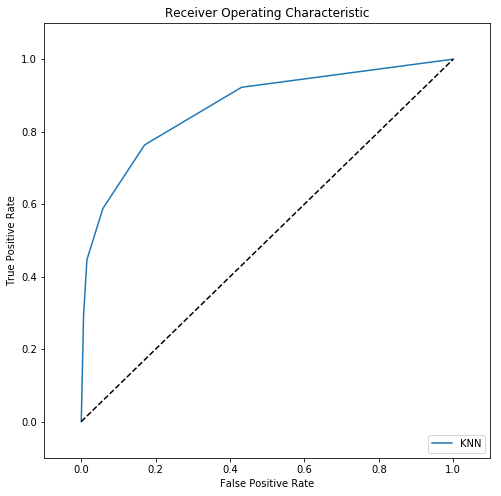

In [40]:
plot_roc_curve(fpr, tpr,'KNN')

# SVM

In [41]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0,probability=True)
classifier.fit(X_train, y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

classifier score 0.9952501583280557
Confusion Matrix
[[2105    9]
 [   6 1038]]


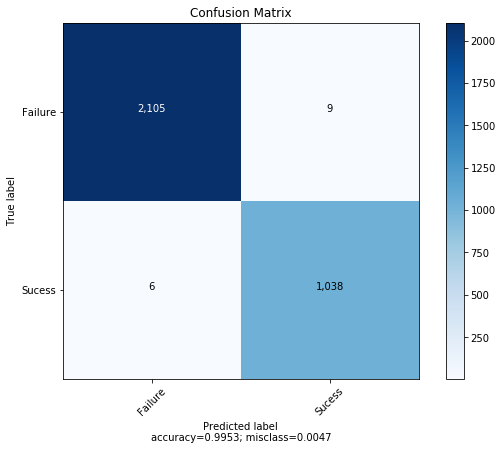

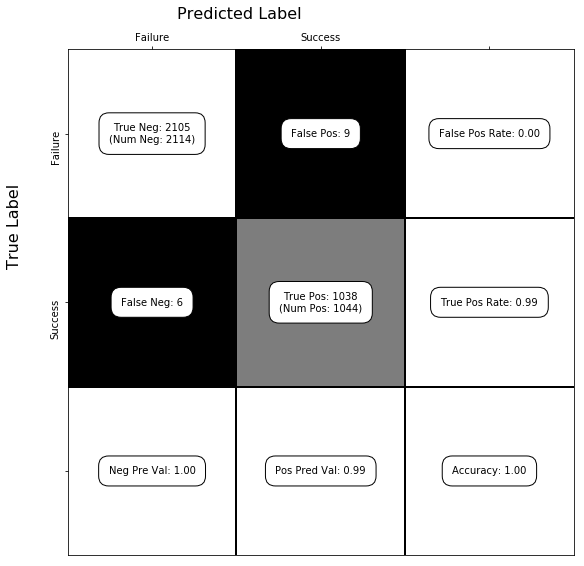

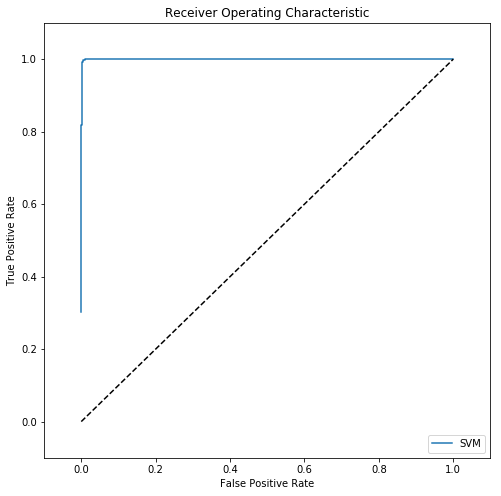

Area under ROC curve 0.9996588153416197


In [43]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'SVM')
print ('Area under ROC curve',auc(fpr, tpr))

---

# SVM gaussian Kernel

In [44]:
classifier = SVC(kernel = 'rbf', random_state = 0,probability=True)
classifier.fit(X_train, y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

classifier score 0.9382520582647245
Confusion Matrix
[[2054   60]
 [ 135  909]]


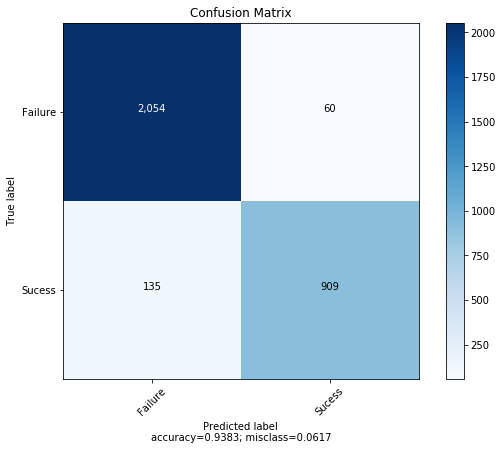

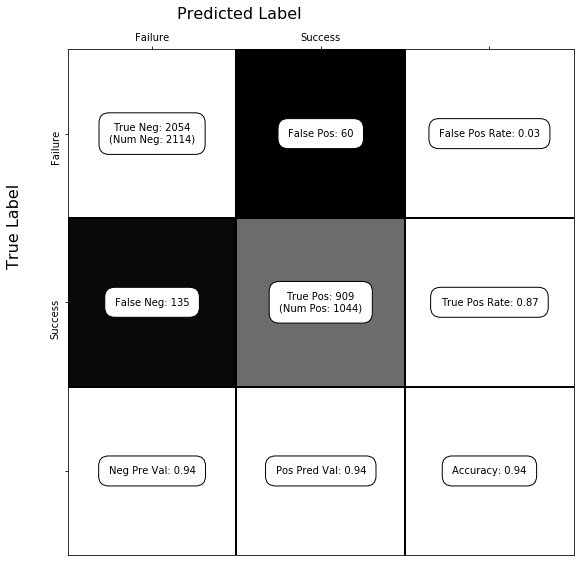

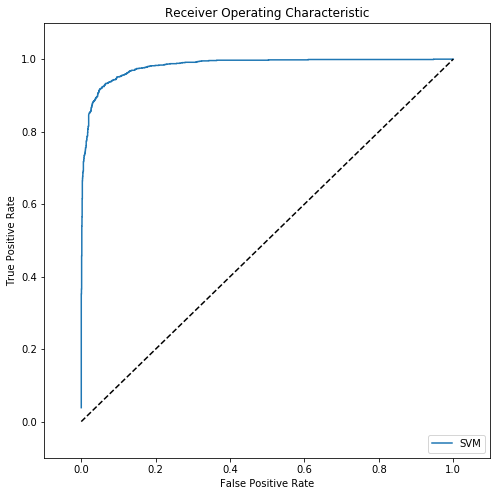

Area under ROC curve 0.9820427219376752


In [45]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'SVM')
print ('Area under ROC curve',auc(fpr, tpr))

----

# Naive Bayes : GaussianNB

In [46]:
#Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

classifier score 0.8502216592780241
Confusion Matrix
[[1679  435]
 [  38 1006]]


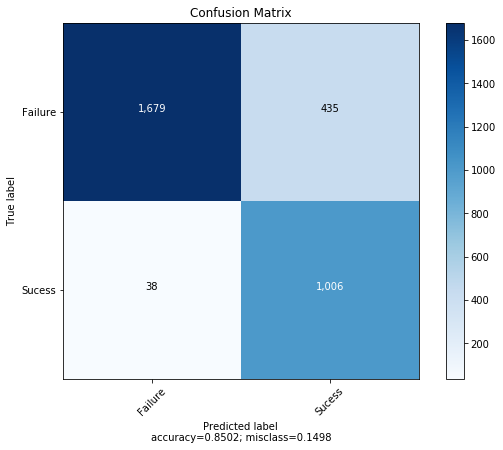

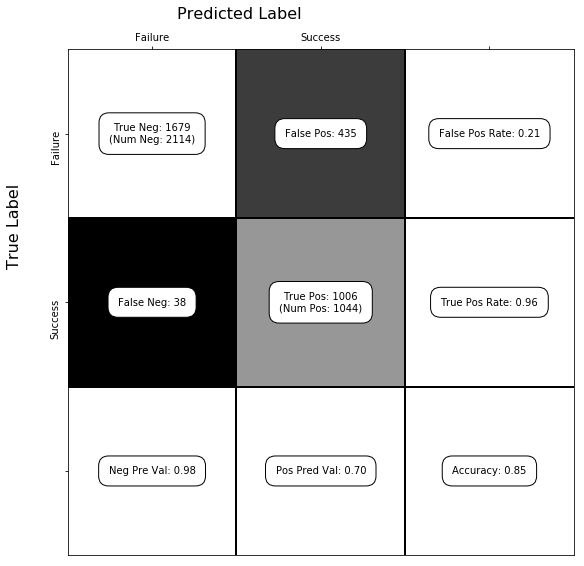

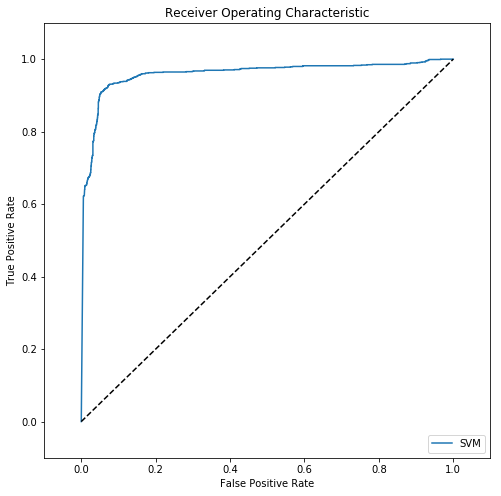

Area under ROC curve 0.9592893753375598


In [47]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'SVM')
print ('Area under ROC curve',auc(fpr, tpr))

---

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

classifier score 0.9962001266624446
Confusion Matrix
[[2109    5]
 [   7 1037]]


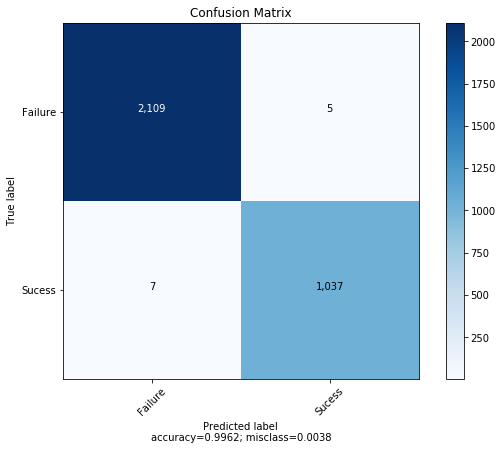

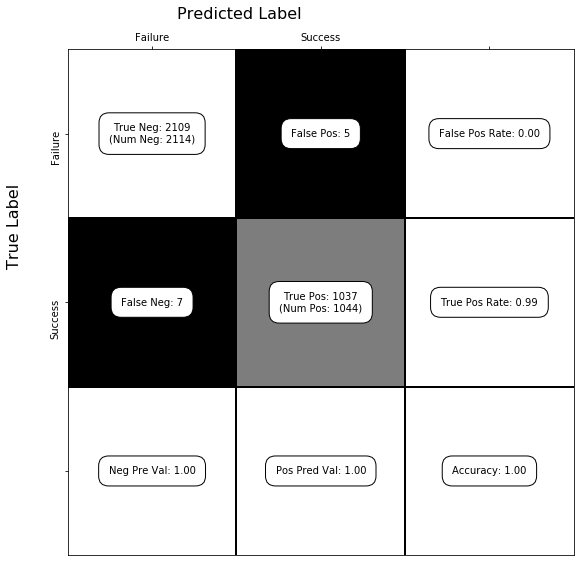

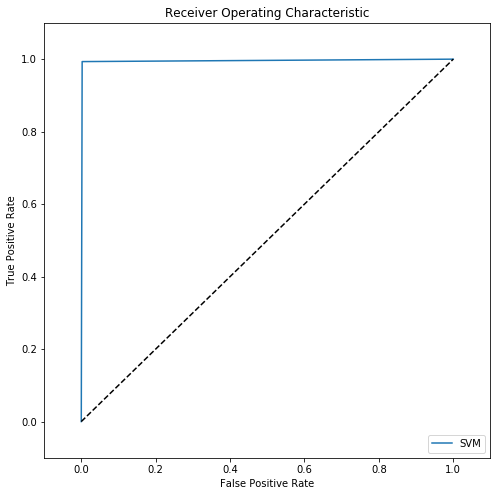

Area under ROC curve 0.9954649173363492


In [49]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'SVM')
print ('Area under ROC curve',auc(fpr, tpr))

In [50]:
# Load libraries
import pydotplus
from IPython.display import Image
from sklearn import tree

In [51]:
dot_data = tree.export_graphviz(classifier , out_file=None, 
                                feature_names=X_train.columns)

In [53]:
graph = pydotplus.graph_from_dot_data(dot_data) 

In [58]:
#Image(graph.create_png())

In [56]:
# Create PNG
graph.write_png("kickstart.png")

True

---

# Random Forest Classification

In [57]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

classifier score 0.9882837238758708
Confusion Matrix
[[2100   14]
 [  23 1021]]


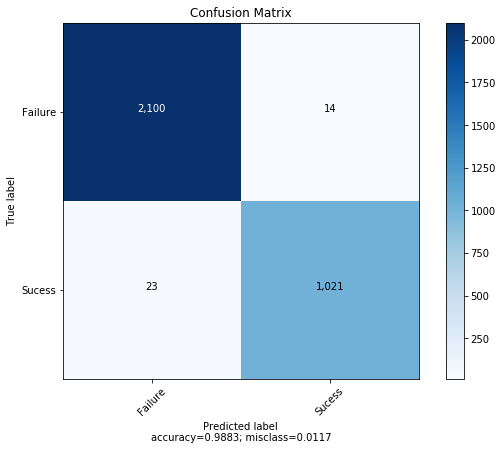

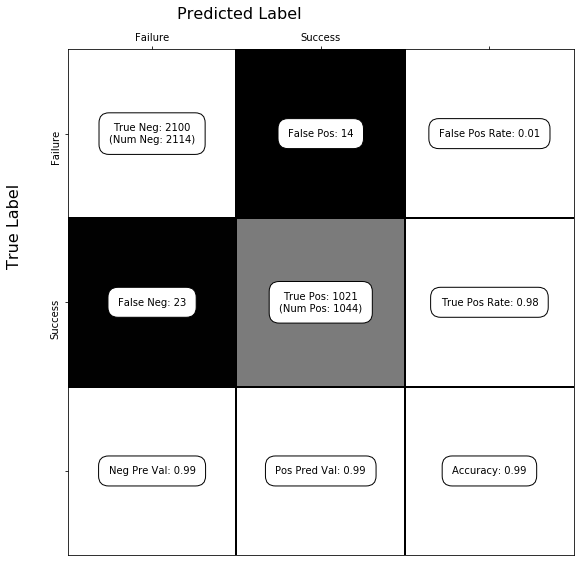

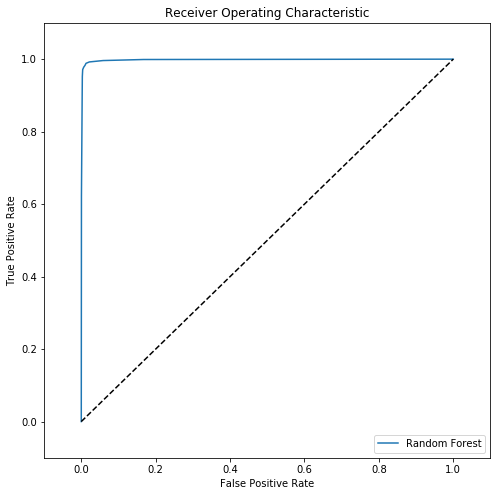

Area under ROC curve 0.9980074906570682


In [60]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'Random Forest')
print ('Area under ROC curve',auc(fpr, tpr))

---

In [62]:
# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(random_state = 0)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

classifier score 0.9974667511082964
Confusion Matrix
[[2109    5]
 [   3 1041]]


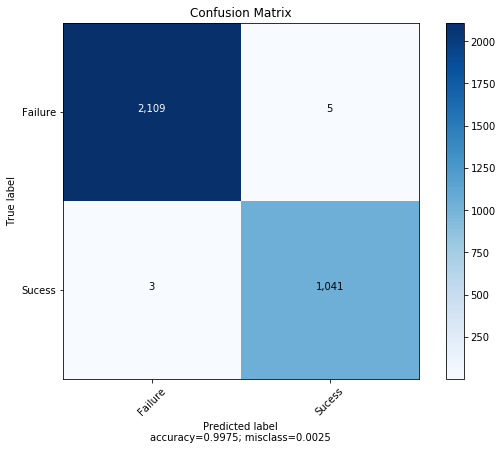

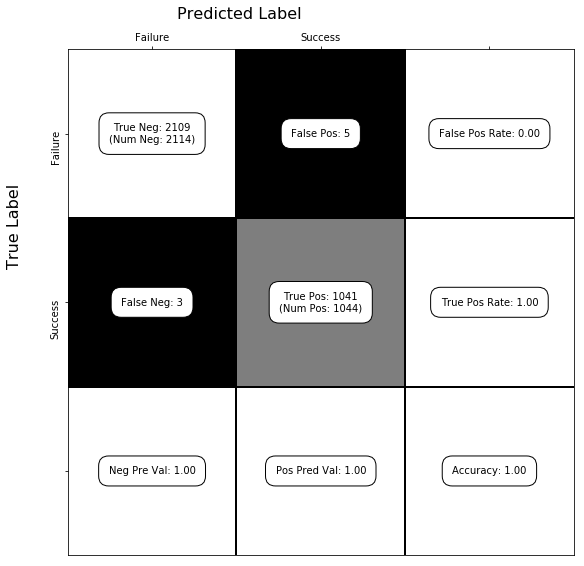

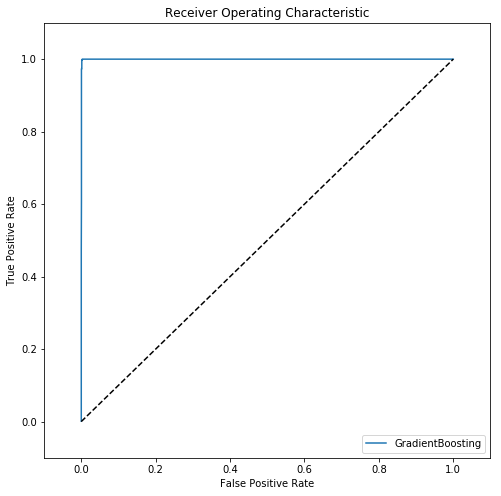

Area under ROC curve 0.9997546460922803


In [63]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'GradientBoosting')
print ('Area under ROC curve',auc(fpr, tpr))

-------

# neural_network

In [64]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

classifier score 0.9901836605446485
Confusion Matrix
[[2090   24]
 [   7 1037]]


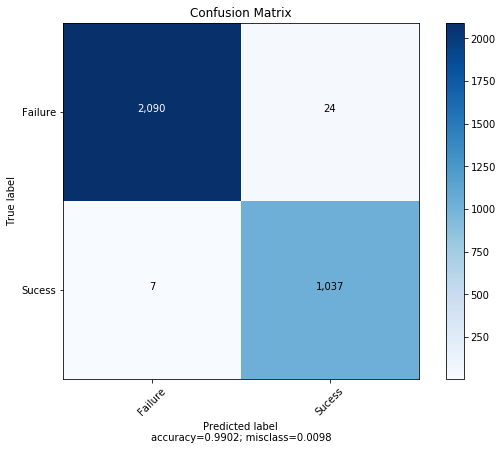

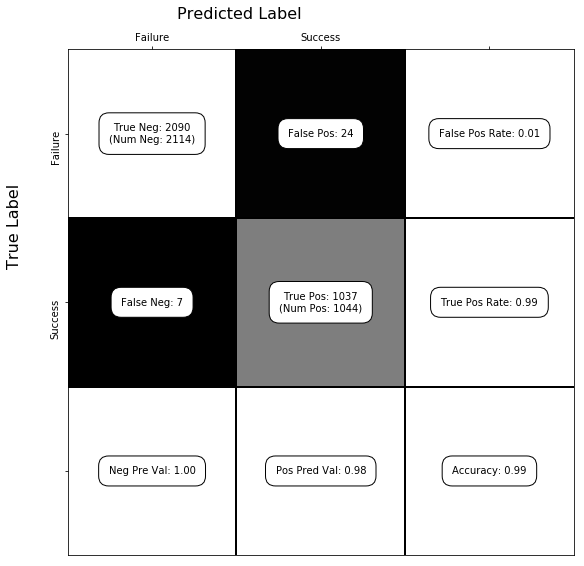

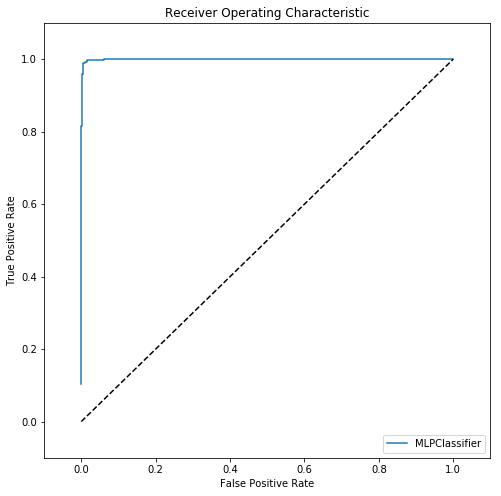

Area under ROC curve 0.9994014542712876


In [65]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'MLPClassifier')
print ('Area under ROC curve',auc(fpr, tpr))

---

# GaussianProcessClassifier

In [67]:
from sklearn.gaussian_process import GaussianProcessClassifier
classifier = GaussianProcessClassifier()
classifier.fit(X_train, y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=1,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False)

classifier score 0.8280557314756175
Confusion Matrix
[[1957  157]
 [ 386  658]]


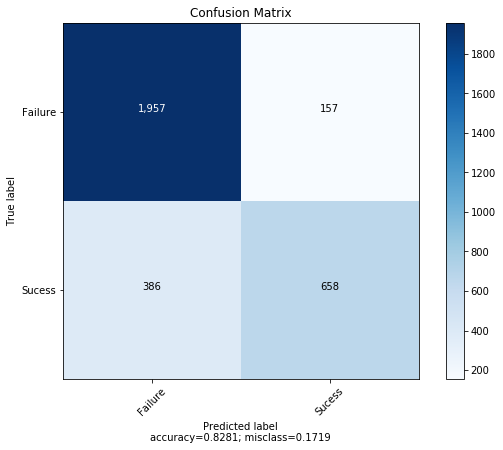

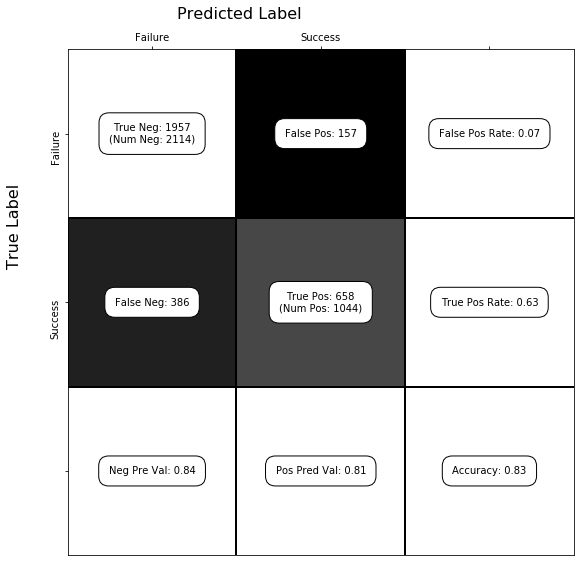

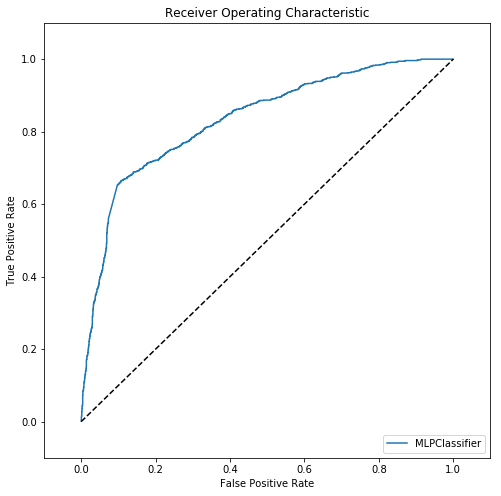

Area under ROC curve 0.8332821329795526


In [68]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'MLPClassifier')
print ('Area under ROC curve',auc(fpr, tpr))

---

---

# AdaBoostClassifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

classifier score 0.9971500949968335
Confusion Matrix
[[2108    6]
 [   3 1041]]


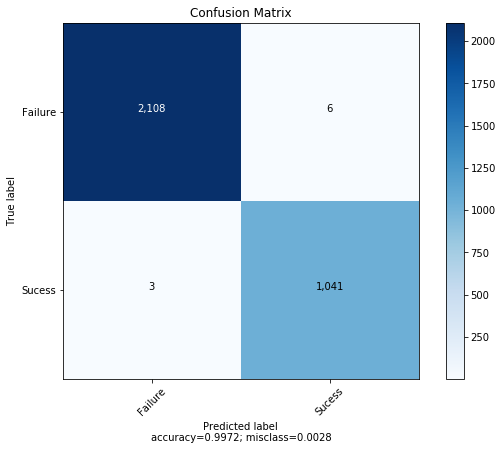

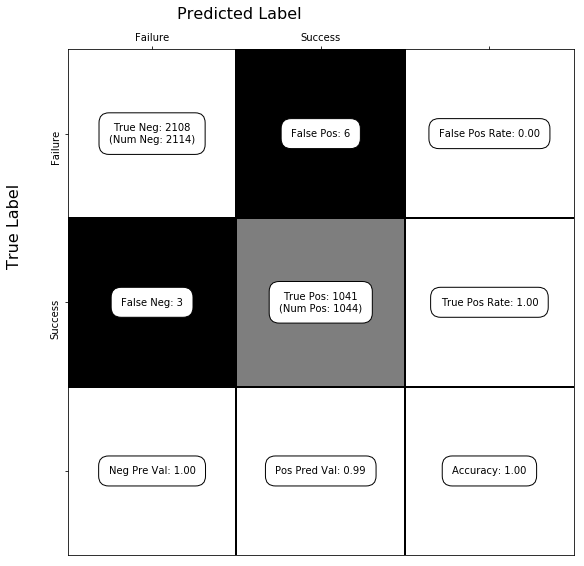

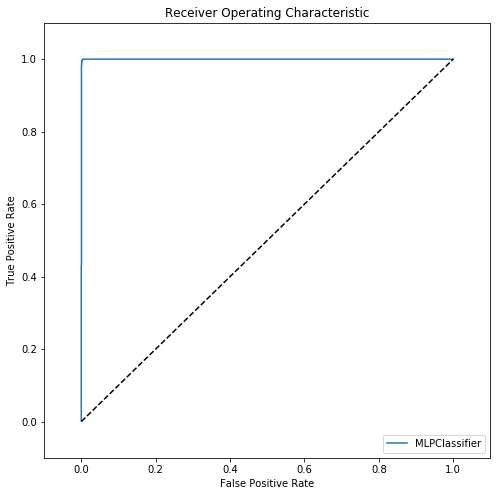

Area under ROC curve 0.9997102422456385


In [71]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'MLPClassifier')
print ('Area under ROC curve',auc(fpr, tpr))

---

# QuadraticDiscriminantAnalysis

In [72]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

classifier score 0.4122862571247625
Confusion Matrix
[[ 269 1845]
 [  11 1033]]


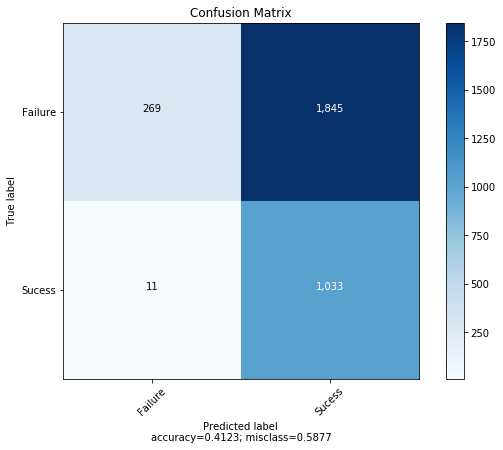

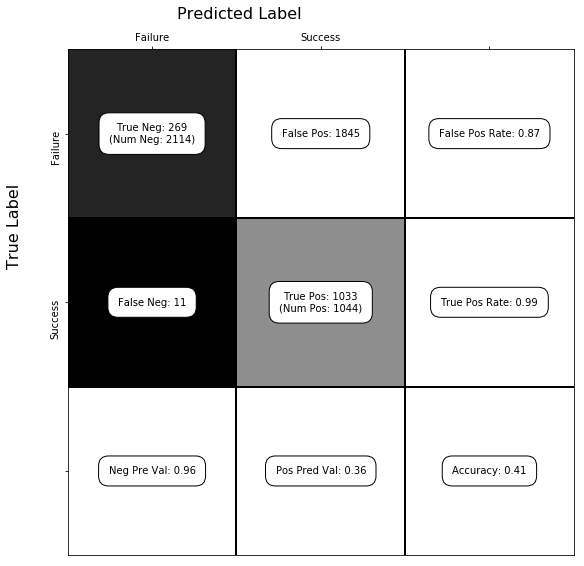

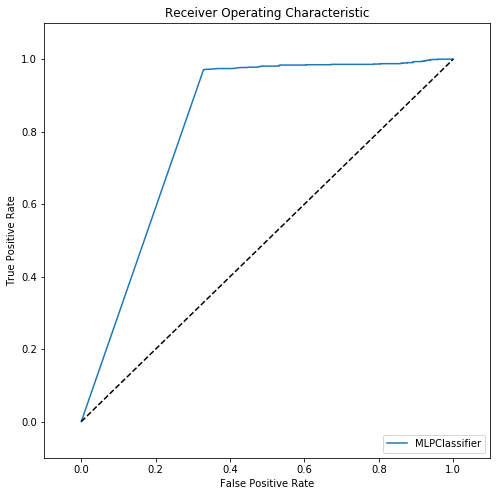

Area under ROC curve 0.8207500534658563


In [73]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'MLPClassifier')
print ('Area under ROC curve',auc(fpr, tpr))

----

# [Stochastic Gradient Descent](http://scikit-learn.org/stable/modules/sgd.html)

In [76]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss="log", penalty="l2")
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

classifier score 0.7995566814439519
Confusion Matrix
[[1531  583]
 [  50  994]]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


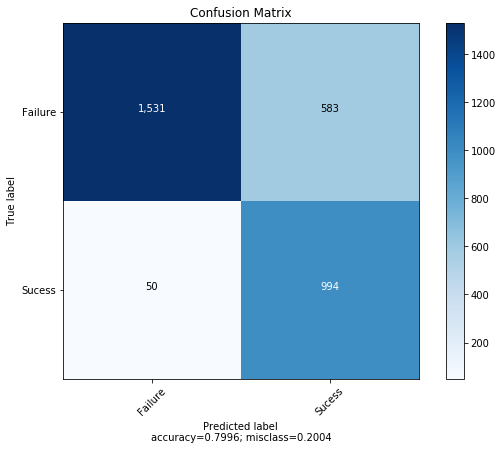

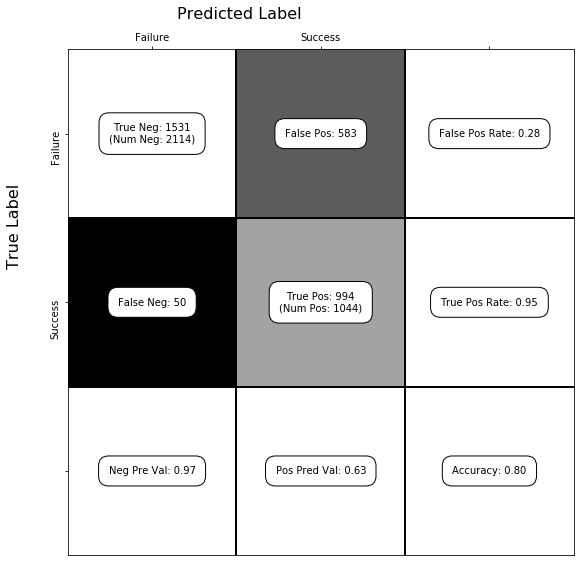

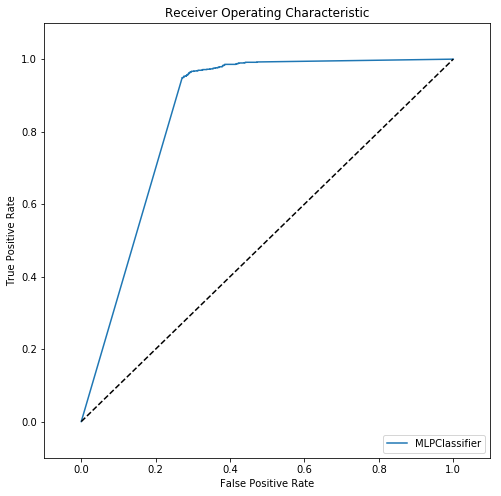

Area under ROC curve 0.8509213345077697


In [77]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'MLPClassifier')
print ('Area under ROC curve',auc(fpr, tpr))

---